In [101]:
import pandas as pd
import numpy as np

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import re


import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("./data/retailInvestor_basket_0428.xlsx")

In [3]:
df.head()

,Symbol Name,KODEX 200,KODEX 레버리지,TIGER 200,KODEX 200선물인버스2X,KODEX 단기채권,TIGER 단기통안채,KBSTAR 200,KODEX 종합채권(AA-이상)액티브,KODEX 코스닥150 레버리지,...,TIGER 대만TAIEX선물(H),TIGER 금속선물(H),KBSTAR 200중공업,ARIRANG ESG우수기업,ARIRANG KRX300IT,KBSTAR 200에너지화학,TIGER 코스닥150로우볼,ARIRANG KRX300금융,ARIRANG 스마트베타 Momentum,ARIRANG KRX300자유소비재
0,2010-01-04,-480644,0,-770,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-01-05,64395,0,-32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010-01-06,-261319,0,-2775,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-01-07,460193,0,305,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-01-08,-497700,0,10262,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Columns: 450 entries, Symbol Name to ARIRANG KRX300자유소비재
dtypes: datetime64[ns](1), int64(449)
memory usage: 8.7 MB


In [5]:
df.describe()

,KODEX 200,KODEX 레버리지,TIGER 200,KODEX 200선물인버스2X,KODEX 단기채권,TIGER 단기통안채,KBSTAR 200,KODEX 종합채권(AA-이상)액티브,KODEX 코스닥150 레버리지,KODEX 200TR,...,TIGER 대만TAIEX선물(H),TIGER 금속선물(H),KBSTAR 200중공업,ARIRANG ESG우수기업,ARIRANG KRX300IT,KBSTAR 200에너지화학,TIGER 코스닥150로우볼,ARIRANG KRX300금융,ARIRANG 스마트베타 Momentum,ARIRANG KRX300자유소비재
count,2.547000e+03,2.547000e+03,2.547000e+03,2.547000e+03,2.547000e+03,2.547000e+03,2547.000000,2547.000000,2.547000e+03,2547.000000,...,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000
mean,-1.652058e+03,6.309025e+04,5.322846e+03,1.018325e+05,1.487911e+03,1.502517e+03,144.941500,327.690616,5.004548e+04,696.386337,...,3.772674,18.728308,5.049470,1.829211,6.049863,6.347075,6.678838,0.375736,2.760503,0.133098
std,5.920604e+05,5.183263e+06,1.446388e+05,1.517662e+06,8.127270e+04,1.861182e+05,12938.582029,12216.726505,1.278070e+06,6537.181263,...,338.692509,897.692858,203.008722,73.079057,233.277144,127.797481,1239.469255,27.908400,418.150055,10.900173
min,-3.157555e+06,-3.037051e+07,-2.470992e+06,-1.459465e+07,-2.179266e+06,-2.887659e+06,-213955.000000,-208515.000000,-1.054910e+07,-44115.000000,...,-4733.000000,-9384.000000,-4648.000000,-1039.000000,-2669.000000,-1658.000000,-21814.000000,-612.000000,-15515.000000,-246.000000
25%,-2.744310e+05,-1.759741e+06,-1.966450e+04,0.000000e+00,-1.136100e+04,-2.318500e+03,-352.000000,0.000000,0.000000e+00,0.000000,...,0.000000,-21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.952400e+04,-4.407300e+04,4.730000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.110450e+05,1.546147e+06,2.211800e+04,0.000000e+00,1.371550e+04,3.184000e+03,733.500000,0.000000,0.000000e+00,0.000000,...,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.799112e+06,3.213692e+07,1.340038e+06,2.176018e+07,1.373779e+06,5.374748e+06,176861.000000,127652.000000,1.676320e+07,177910.000000,...,5245.000000,16539.000000,5183.000000,1255.000000,7492.000000,2996.000000,36318.000000,603.000000,6063.000000,278.000000


- 2010년 ~ 2020년 4월까지의 일별 국내상장 ETF별 개인투자자 순매수 금액 데이터

In [6]:
df_copy = df.copy()

In [7]:
df_copy.head()

,Symbol Name,KODEX 200,KODEX 레버리지,TIGER 200,KODEX 200선물인버스2X,KODEX 단기채권,TIGER 단기통안채,KBSTAR 200,KODEX 종합채권(AA-이상)액티브,KODEX 코스닥150 레버리지,...,TIGER 대만TAIEX선물(H),TIGER 금속선물(H),KBSTAR 200중공업,ARIRANG ESG우수기업,ARIRANG KRX300IT,KBSTAR 200에너지화학,TIGER 코스닥150로우볼,ARIRANG KRX300금융,ARIRANG 스마트베타 Momentum,ARIRANG KRX300자유소비재
0,2010-01-04,-480644,0,-770,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-01-05,64395,0,-32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010-01-06,-261319,0,-2775,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-01-07,460193,0,305,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-01-08,-497700,0,10262,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
col_name = df_copy.columns

In [9]:
col_name

Index(['Symbol Name', 'KODEX 200', 'KODEX 레버리지', 'TIGER 200',
       'KODEX 200선물인버스2X', 'KODEX 단기채권', 'TIGER 단기통안채', 'KBSTAR 200',
       'KODEX 종합채권(AA-이상)액티브', 'KODEX 코스닥150 레버리지',
       ...
       'TIGER 대만TAIEX선물(H)', 'TIGER 금속선물(H)', 'KBSTAR 200중공업',
       'ARIRANG ESG우수기업', 'ARIRANG KRX300IT', 'KBSTAR 200에너지화학',
       'TIGER 코스닥150로우볼', 'ARIRANG KRX300금융', 'ARIRANG 스마트베타 Momentum',
       'ARIRANG KRX300자유소비재'],
      dtype='object', length=450)

In [10]:
col_name = col_name.drop('Symbol Name')

- 순매수 금액이 1억을 넘으면 "1", 그렇지 않으면 "0" 으로 인코딩

In [11]:
for i in col_name:
    
    m_buy = df_copy[i] > 100000
    m_none = df_copy[i] < 100000
    
    df_copy.loc[m_buy, i] = 1
    df_copy.loc[m_none, i] = 0

In [12]:
df_copy.head()

,Symbol Name,KODEX 200,KODEX 레버리지,TIGER 200,KODEX 200선물인버스2X,KODEX 단기채권,TIGER 단기통안채,KBSTAR 200,KODEX 종합채권(AA-이상)액티브,KODEX 코스닥150 레버리지,...,TIGER 대만TAIEX선물(H),TIGER 금속선물(H),KBSTAR 200중공업,ARIRANG ESG우수기업,ARIRANG KRX300IT,KBSTAR 200에너지화학,TIGER 코스닥150로우볼,ARIRANG KRX300금융,ARIRANG 스마트베타 Momentum,ARIRANG KRX300자유소비재
0,2010-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-01-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010-01-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-01-07,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-01-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_copy.drop(['Symbol Name'], inplace = True, axis = 1)

In [14]:
df_copy.head()

,KODEX 200,KODEX 레버리지,TIGER 200,KODEX 200선물인버스2X,KODEX 단기채권,TIGER 단기통안채,KBSTAR 200,KODEX 종합채권(AA-이상)액티브,KODEX 코스닥150 레버리지,KODEX 200TR,...,TIGER 대만TAIEX선물(H),TIGER 금속선물(H),KBSTAR 200중공업,ARIRANG ESG우수기업,ARIRANG KRX300IT,KBSTAR 200에너지화학,TIGER 코스닥150로우볼,ARIRANG KRX300금융,ARIRANG 스마트베타 Momentum,ARIRANG KRX300자유소비재
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Apriori 라이브러리를 사용하기 위해 "1","0"으로 인코딩된 트렌젝션 데이터 값을 1이면 "True", 0이면 "False" 값으로 변경

In [15]:
df_copy_temp = df_copy == 1

In [16]:
df_copy_temp.head()

,KODEX 200,KODEX 레버리지,TIGER 200,KODEX 200선물인버스2X,KODEX 단기채권,TIGER 단기통안채,KBSTAR 200,KODEX 종합채권(AA-이상)액티브,KODEX 코스닥150 레버리지,KODEX 200TR,...,TIGER 대만TAIEX선물(H),TIGER 금속선물(H),KBSTAR 200중공업,ARIRANG ESG우수기업,ARIRANG KRX300IT,KBSTAR 200에너지화학,TIGER 코스닥150로우볼,ARIRANG KRX300금융,ARIRANG 스마트베타 Momentum,ARIRANG KRX300자유소비재
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df_copy_temp.shape

(2547, 449)

- apriori 라이브러리를 사용하여 지지도(support) 0.1 이상의 ETF 거래데이터를 추출

In [18]:
itemset = apriori(df_copy_temp, min_support=0.1, use_colnames=True)

In [19]:
itemset.sort_values(["support"], ascending=False).head(10)

,support,itemsets
1,0.454653,(KODEX 레버리지)
4,0.435807,(KODEX 인버스)
0,0.343934,(KODEX 200)
7,0.282293,"(KODEX 레버리지, KODEX 200)"
2,0.172360,(KODEX 200선물인버스2X)
3,0.170004,(KODEX 코스닥150 레버리지)
9,0.112682,"(KODEX 인버스, KODEX 200선물인버스2X)"
5,0.110718,(KODEX 코스닥150선물인버스)
6,0.107185,(TIGER 레버리지)
8,0.106007,"(KODEX 레버리지, TIGER 레버리지)"


- 신뢰도(confidence)가 0.1 이상인 ETF 연관거래 데이터의 지지도, 향상도를 산출

In [120]:
rules_ca = association_rules(itemset, metric="confidence", min_threshold=0.1)

In [121]:
rules_ca = rules_ca[['antecedents', 'consequents','support', 'confidence', 'lift']]

- 향상도(lift) 기준으로 내림차순 정렬
- 향상도가 가장 높은 거래는 KODEX레버리지 -> TIGER레버리지
- 신뢰도가 가장 높은 거래는 TIGER레버리지 -> KODEX레버리지
- 지지도, 향상도, 신뢰도가 고루 높은 거래는 KODEX 200 -> KODEX레버리지

In [122]:
rules_ca = rules_ca.sort_values('lift', ascending=False)

In [123]:
rules_ca.head(10)

,antecedents,consequents,support,confidence,lift
2,(KODEX 레버리지),(TIGER 레버리지),0.106007,0.233161,2.175312
3,(TIGER 레버리지),(KODEX 레버리지),0.106007,0.989011,2.175312
0,(KODEX 레버리지),(KODEX 200),0.282293,0.620898,1.805282
1,(KODEX 200),(KODEX 레버리지),0.282293,0.820776,1.805282
4,(KODEX 인버스),(KODEX 200선물인버스2X),0.112682,0.258559,1.500111
5,(KODEX 200선물인버스2X),(KODEX 인버스),0.112682,0.653759,1.500111


In [124]:
rules_ca.reset_index(inplace=True)

In [125]:
rules_ca.head()

,index,antecedents,consequents,support,confidence,lift
0,2,(KODEX 레버리지),(TIGER 레버리지),0.106007,0.233161,2.175312
1,3,(TIGER 레버리지),(KODEX 레버리지),0.106007,0.989011,2.175312
2,0,(KODEX 레버리지),(KODEX 200),0.282293,0.620898,1.805282
3,1,(KODEX 200),(KODEX 레버리지),0.282293,0.820776,1.805282
4,4,(KODEX 인버스),(KODEX 200선물인버스2X),0.112682,0.258559,1.500111


In [126]:
rules_ca['antecedents'] = rules_ca['antecedents'].astype('str')
rules_ca['consequents'] = rules_ca['consequents'].astype('str')

In [127]:
rules_ca['antecedents']=rules_ca['antecedents'].str.replace("frozenset","")
rules_ca['consequents']=rules_ca['consequents'].str.replace("frozenset","")

In [128]:
rules_ca.antecedents = rules_ca.antecedents.apply(''.join).str.replace('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','')
rules_ca.consequents = rules_ca.consequents.apply(''.join).str.replace('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','')

In [129]:
rules_ca['ant_con'] = rules_ca[['antecedents', 'consequents']].apply(lambda x: ' '.join(x), axis=1)

In [130]:
rules_ca

,index,antecedents,consequents,support,confidence,lift,ant_con
0,2,{KODEX 레버리지},{TIGER 레버리지},0.106007,0.233161,2.175312,{KODEX 레버리지} {TIGER 레버리지}
1,3,{TIGER 레버리지},{KODEX 레버리지},0.106007,0.989011,2.175312,{TIGER 레버리지} {KODEX 레버리지}
2,0,{KODEX 레버리지},{KODEX 200},0.282293,0.620898,1.805282,{KODEX 레버리지} {KODEX 200}
3,1,{KODEX 200},{KODEX 레버리지},0.282293,0.820776,1.805282,{KODEX 200} {KODEX 레버리지}
4,4,{KODEX 인버스},{KODEX 200선물인버스2X},0.112682,0.258559,1.500111,{KODEX 인버스} {KODEX 200선물인버스2X}
5,5,{KODEX 200선물인버스2X},{KODEX 인버스},0.112682,0.653759,1.500111,{KODEX 200선물인버스2X} {KODEX 인버스}


In [131]:
ca_support=rules_ca.as_matrix(columns=['support'])
ca_confidence=rules_ca.as_matrix(columns=['confidence'])
ca_lift=rules_ca.as_matrix(columns=['lift'])

C:\Users\kt347\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

C:\Users\kt347\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

C:\Users\kt347\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



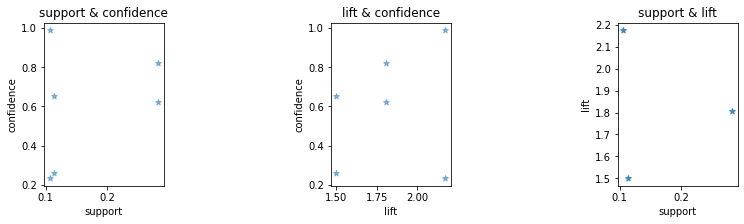

In [132]:
plt.figure(figsize=(15,3))

for i in range (len(ca_support)):
    ca_support[i] = ca_support[i] 
    ca_confidence[i] = ca_confidence[i]

plt.subplot(161) 
plt.title("support & confidence")
plt.scatter(ca_support, ca_confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
#plt.show()


for i in range (len(ca_support)):
    ca_lift[i] = ca_lift[i]
    ca_confidence[i] = ca_confidence[i]
    
plt.subplot(163)
plt.title("lift & confidence")
plt.scatter(ca_lift, ca_confidence,  alpha=0.5, marker="*")
plt.xlabel('lift')
plt.ylabel('confidence') 
#plt.show()


for i in range (len(ca_support)):
    ca_support[i] = ca_support[i]
    ca_confidence[i] = ca_confidence[i]

plt.subplot(165)
plt.title("support & lift")
plt.scatter(ca_support, ca_lift,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('lift') 

plt.show()


In [133]:
import plotly.express as px
df = rules_ca
fig = px.scatter_3d(df, x='support', y='confidence', z='lift', color= 'ant_con')
fig.show()

- 지지도, 신뢰도, 향상도를 변수로 3D그래프 생성